# 配合调试main.py

In [1]:
import pandas as pd
import akshare as ak


## 获取数据

In [2]:
import pandas as pd
df = pd.read_csv(
    "../data/Hist_2023-03-20.csv", parse_dates=['日期'], index_col=0, dtype={"股票代码": object})
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 71152 entries, 2023-03-01 to 2023-03-20
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   开盘      71152 non-null  float64
 1   收盘      71152 non-null  float64
 2   最高      71152 non-null  float64
 3   最低      71152 non-null  float64
 4   成交量     71152 non-null  int64  
 5   成交额     71152 non-null  float64
 6   振幅      71152 non-null  float64
 7   涨跌幅     71152 non-null  float64
 8   涨跌额     71152 non-null  float64
 9   换手率     71152 non-null  float64
 10  股票代码    71152 non-null  object 
 11  板块名称    71152 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 7.1+ MB


## 获得总股本

In [3]:
import pandas as pd
value = pd.read_csv(
    "../data/总股本.csv", index_col=0, dtype={"代码": object})
value_dict = value['总股本'].to_dict()
value_dict['688018']


80484430.0

In [9]:
# 按股票名称分组，并统计涨幅大于0和小于0的股票数量
result = df.groupby(["日期",'板块名称'])['涨跌幅'].agg(
    [('涨的数量', lambda x: sum(x > 0)), ('跌的数量', lambda x: sum(x < 0))])
result['涨幅'] = result['涨的数量']/(result['涨的数量']+result['跌的数量'])*100
result


涨的数量  跌的数量         涨幅
日期         板块名称                           
2023-03-01 IT服务       120     7  94.488189
           LED         30     7  81.081081
           专业工程        31     3  91.176471
           专业服务        20     6  76.923077
           专业连锁         6     1  85.714286
...                   ...   ...        ...
2023-03-20 食品及饲料添加剂     6    13  31.578947
           餐饮           2     1  66.666667
           饰品          11     5  68.750000
           饲料           2    16  11.111111
           高速公路         5    13  27.777778

[3290 rows x 3 columns]

In [11]:
cur_df = df.groupby(["日期", "板块名称"]).agg(
    {"涨跌幅": "mean", "总市值": "sum"})
cur_df


涨跌幅           总市值
日期         板块名称                            
2023-03-01 IT服务      4.119685  1.235165e+12
           LED       1.122821  2.941001e+11
           专业工程      1.343529  3.725464e+11
           专业服务      0.585556  1.848354e+11
           专业连锁      0.792500  6.418736e+10
...                       ...           ...
2023-03-20 食品及饲料添加剂 -0.666500  1.584158e+11
           餐饮        0.846667  2.143710e+10
           饰品        0.995625  1.220344e+11
           饲料       -1.441667  2.820616e+11
           高速公路     -0.829500  2.353763e+11

[3290 rows x 2 columns]

In [12]:
# Join the two dataframes on the multiindex
joined_df = result.join(cur_df, on=["日期", "板块名称"])


In [15]:
joined_df.dropna(inplace=True,axis=0)

In [20]:
data=joined_df.loc['2023-03-10']
data.loc['高速公路']

涨的数量    1.000000e+00
跌的数量    1.900000e+01
涨幅      5.000000e+00
涨跌幅    -1.070500e+00
总市值     2.304904e+11
Name: 高速公路, dtype: float64

In [16]:
joined_df.isnull().sum()


涨的数量    0
跌的数量    0
涨幅      0
涨跌幅     0
总市值     0
dtype: int64

In [17]:
joined_df[joined_df['涨幅'] == 0]


涨的数量  跌的数量   涨幅       涨跌幅           总市值
日期         板块名称                                          
2023-03-01 化学制药      0     3  0.0 -0.306667  1.856248e+10
           家纺        0     7  0.0 -0.607143  2.955425e+10
           旅游零售      0     1  0.0 -0.370000  3.843448e+11
2023-03-02 农业综合      0     3  0.0 -0.236667  1.273984e+10
           冰洗        0     5  0.0 -1.028000  1.822738e+11
...                ...   ...  ...       ...           ...
2023-03-20 航空运输      0     8  0.0 -1.710000  2.134061e+11
           血液制品      0     6  0.0 -2.521667  1.231834e+11
           软饮料       0    10  0.0 -1.465455  1.558433e+11
           辅料        0     3  0.0 -0.823333  1.622864e+10
           通信服务Ⅲ     0     7  0.0 -5.168571  7.120478e+11

[395 rows x 5 columns]

In [8]:
result.describe()


,涨的数量,跌的数量,涨幅
count,235.000000,235.000000,235.000000
mean,125.038298,168.812766,42.557957
std,136.830962,191.365491,7.605456
min,4.000000,8.000000,26.811594
25%,43.500000,63.000000,37.291720
50%,81.000000,110.000000,41.588785
75%,150.500000,205.000000,46.734051
max,1018.000000,1839.000000,74.358974


In [10]:
df['总股本'] = df['股票代码'].apply(lambda x: value_dict.get(x))
df['总市值'] = df['总股本']*df['收盘']
df.head()

,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率,股票代码,板块名称,总股本,总市值
日期,,,,,,,,,,,,,,
2023-03-01,22.55,22.42,22.83,22.18,98735,221958533.0,2.90,0.18,0.04,3.03,300119,动物保健,468018786.0,1.049298e+10
2023-03-02,22.44,21.73,22.54,21.64,53425,117040504.0,4.01,-3.08,-0.69,1.64,300119,动物保健,468018786.0,1.017005e+10
2023-03-03,21.89,21.27,22.18,21.12,57008,122635566.0,4.88,-2.12,-0.46,1.75,300119,动物保健,468018786.0,9.954760e+09
2023-03-06,21.30,21.73,21.89,21.17,49037,106350983.0,3.39,2.16,0.46,1.50,300119,动物保健,468018786.0,1.017005e+10
2023-03-07,21.82,21.27,22.22,21.17,41433,89342602.0,4.83,-2.12,-0.46,1.27,300119,动物保健,468018786.0,9.954760e+09


In [21]:
# 将Salary列格式化为亿元
joined_df['总市值亿元'] = joined_df['总市值'].apply(
    lambda x: '{:.2f}亿元'.format(x/100000000))


In [22]:
joined_df


涨的数量  跌的数量         涨幅       涨跌幅           总市值       总市值亿元
日期         板块名称                                                               
2023-03-01 IT服务       120     7  94.488189  4.119685  1.235165e+12  12351.65亿元
           LED         30     7  81.081081  1.122821  2.941001e+11   2941.00亿元
           专业工程        31     3  91.176471  1.343529  3.725464e+11   3725.46亿元
           专业服务        20     6  76.923077  0.585556  1.848354e+11   1848.35亿元
           专业连锁         6     1  85.714286  0.792500  6.418736e+10    641.87亿元
...                   ...   ...        ...       ...           ...         ...
2023-03-20 食品及饲料添加剂     6    13  31.578947 -0.666500  1.584158e+11   1584.16亿元
           餐饮           2     1  66.666667  0.846667  2.143710e+10    214.37亿元
           饰品          11     5  68.750000  0.995625  1.220344e+11   1220.34亿元
           饲料           2    16  11.111111 -1.441667  2.820616e+11   2820.62亿元
           高速公路         5    13  27.777778 -0.829500  2.353763e+11   2353.76亿元

[3289 rows x 6 columns]

In [23]:
import plotly.graph_objects as go
data=df[df["股票代码"]=="002771"]
# 创建 trace
trace = go.Candlestick(x=data.index, open=data["开盘"],
                       high=data["最高"], low=data["最低"], close=data["收盘"])

# 创建布局
layout = go.Layout(title='002771K线图', xaxis=dict(
    title='日期'), yaxis=dict(title='价格'))

# 创建 figure 对象并添加 trace 和 layout
fig = go.Figure(data=[trace], layout=layout)

# 显示图形
fig.show()
 


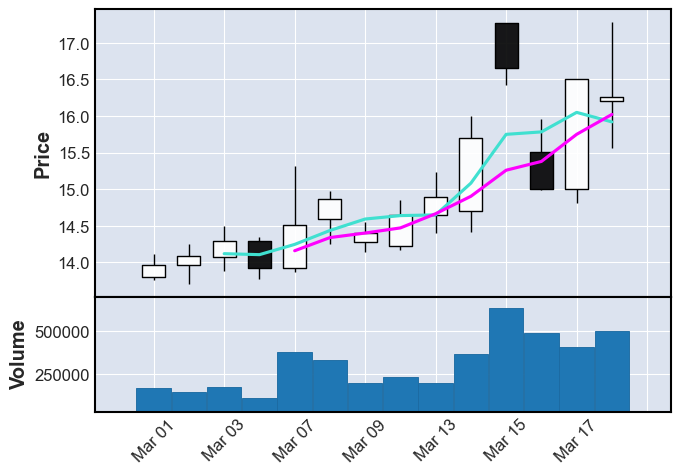

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


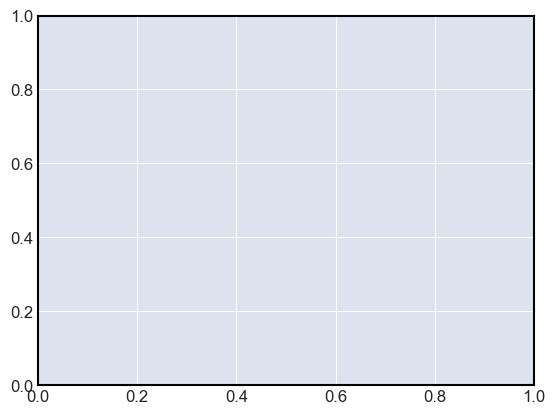

In [28]:
import mplfinance as mpf
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
# df = pd.read_csv('data.csv', index_col=0, parse_dates=True)
# data = df.copy()
data = df[df["股票代码"] == "002771"]
data.index.name = 'Date'
data = data.rename(columns={'开盘': 'Open', '收盘': 'Close',
               '最高': 'High', '最低': 'Low', "成交量":"Volume"})

# 创建 K 线图
# mpf.plot(df, type='candle')
mpf.plot(data, type="candle", mav=(3, 5), volume=True)

# 创建折线图
# plt.plot(df.index, df['Close'], label='Close')

# 添加图例
plt.legend()

# 显示图形
plt.show()


In [30]:
import plotly.graph_objs as go
import pandas as pd

# 读取数据
df = data

# 创建 K 线图
candlestick = go.Candlestick(x=df.index,
                             open=df['Open'],
                             high=df['High'],
                             low=df['Low'],
                             close=df['Close'],
                             name='Candlestick')

# 创建折线图
line = go.Scatter(x=df.index,
                  y=df['Close'],
                  name='Close',
                  line=dict(color='blue'))

# 创建图表布局
layout = go.Layout(title='Stock Price Chart',
                   xaxis=dict(title='Date'),
                   yaxis=dict(title='Price'))

# 将 K 线图和折线图放在一起
fig = go.Figure(data=[candlestick, line], layout=layout)

# 显示图形
fig.show()
